In [13]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from draw_bbox_binary import draw_bounding_box  
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from collections import defaultdict
import torch
from segment_anything.utils.transforms import ResizeLongestSide
from statistics import mean
from tqdm import tqdm
from torch.nn.functional import threshold, normalize


model_type = 'vit_h'
checkpoint = "/home/peter/sam/best_model_original_dice.pth"
device = 'cuda:0'
device_cpu = 'cpu'

mobile_sam = sam_model_registry[model_type](checkpoint=checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()
print("success")
predictor = SamPredictor(mobile_sam)
print("success")

success
success


In [14]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


In [15]:
folder_path = "/home/peter/zebrafish_echo_original/testing_sam_groundtruth/"
files = os.listdir(folder_path)
#get the bounding box annotation
bbox = {}

for f in files:
    curr_path = folder_path + f
    bounding_box = draw_bounding_box(curr_path)  
    bbox[f] = np.array(bounding_box[1])

In [16]:
print(len(bbox))

151


In [5]:
# predict_set = ["Camk2a-4_2021-01-21-15-07-44_50.png", "Camk2b-3_2021-01-07-14-58-47_391.png", "Da-7_2021-01-21-10-54-26_276.png",
#                "Dox2_2022-07-25-17-38-27_49.png", "Map2k-56_2021-01-07-15-52-25_151.png", "Map2k1-3_2022-07-25-18-48-44_21.png",
#                "Mapk3-40_2021-01-07-15-36-29_286.png", "Nc-11b_2020-06-24-11-49-08_90.png", "Pde1a-7_2021-01-21-14-42-45_113.png", 
#                "Wt11_2022-07-25-17-30-23_65.png"]

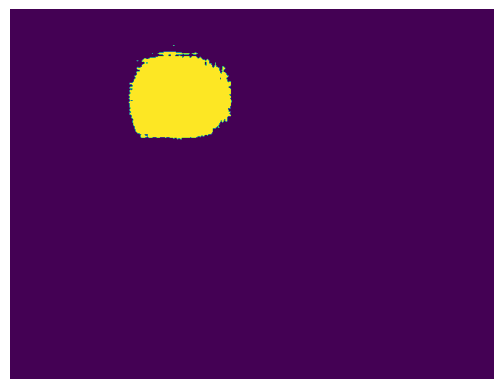

In [17]:
image_path = "/home/peter/zebrafish_echo_original/testing_sam/"
output_path = "/home/peter/sam_original_finetune_diceloss/"
for p in bbox.keys():
    image = cv2.imread(image_path+p)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    predictor.set_image(image)
    input_box = np.array(bbox[p])
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )
    h, w = masks.shape[-2:]
    mask_image = masks.reshape(h, w, 1)
    plt.imshow(mask_image*255)
    plt.axis('off')
    output_filename = os.path.join(output_path, f"{p}_output.png")
    plt.savefig(output_filename, bbox_inches='tight', pad_inches=0)

In [ ]:
image_path = "/home/peter/zebrafish_echo_original/train_new/"
output_path = "/home/peter/mask_sam_train_predict_original_mobilesam/"
for p in predict_set:
    print(p)
    image = cv2.imread(image_path+p)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    predictor.set_image(image)
    input_box = np.array(bbox[p])
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )
    h, w = masks.shape[-2:]
    mask_image = masks.reshape(h, w, 1)
    plt.imshow(mask_image*255)
    plt.axis('off')
    output_filename = os.path.join(output_path, f"{p}_output.png")
    plt.savefig(output_filename, bbox_inches='tight', pad_inches=0)

In [25]:
m = nn.Threshold(0.1, 20)
input = torch.randn(2)
output = m(input)

NameError: name 'nn' is not defined

In [9]:
folder_path = "/home/peter/sam_mobile_predict_non_finetune/"
files = os.listdir(folder_path)
print(len(files))

151
